In [1]:
import numpy as ap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
ds = pd.read_csv(r'C:\Users\hp\Desktop\project internship\Dataset .csv')

In [3]:
ds.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
ds.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
ds.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
numerical_stats = ds.describe()
print(numerical_stats)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [7]:
country_code_distribution = ds['Country Code'].value_counts()
print(country_code_distribution)

city_distribution = ds['City'].value_counts()
print(city_distribution)

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [8]:
cuisines_distribution = ds['Cuisines'].value_counts()
print("\nDistribution of 'Cuisines':")
print(cuisines_distribution)


Distribution of 'Cuisines':
Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64


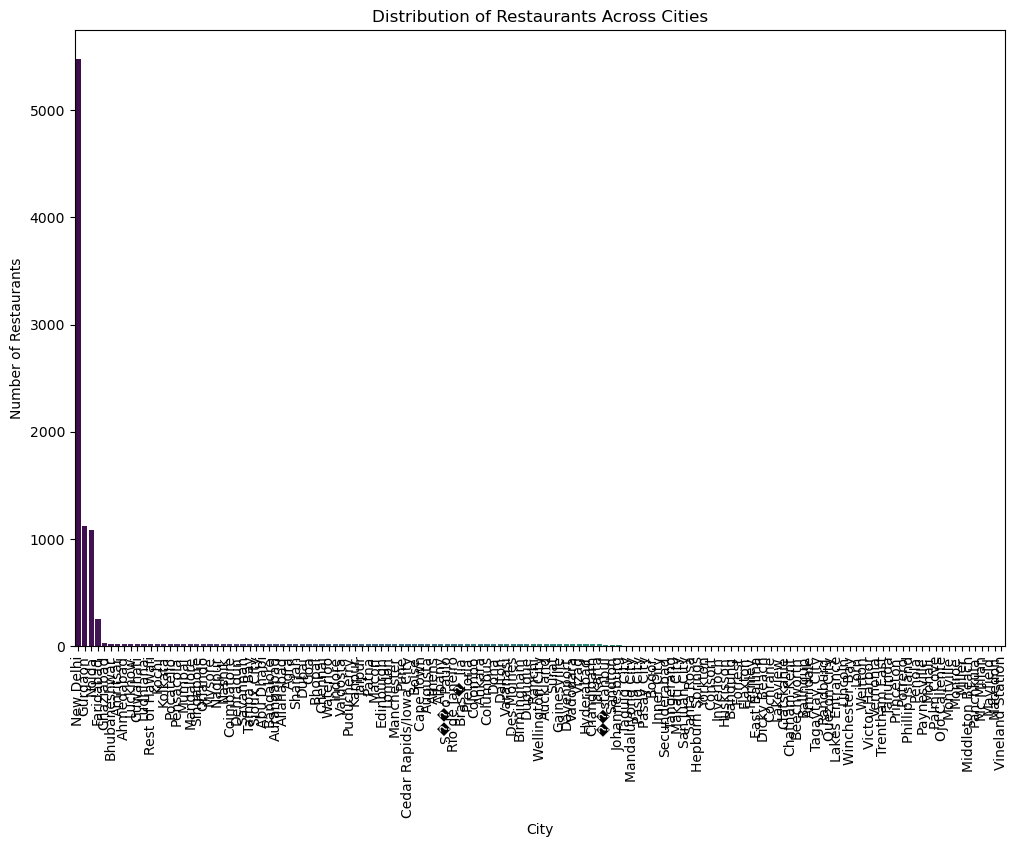

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

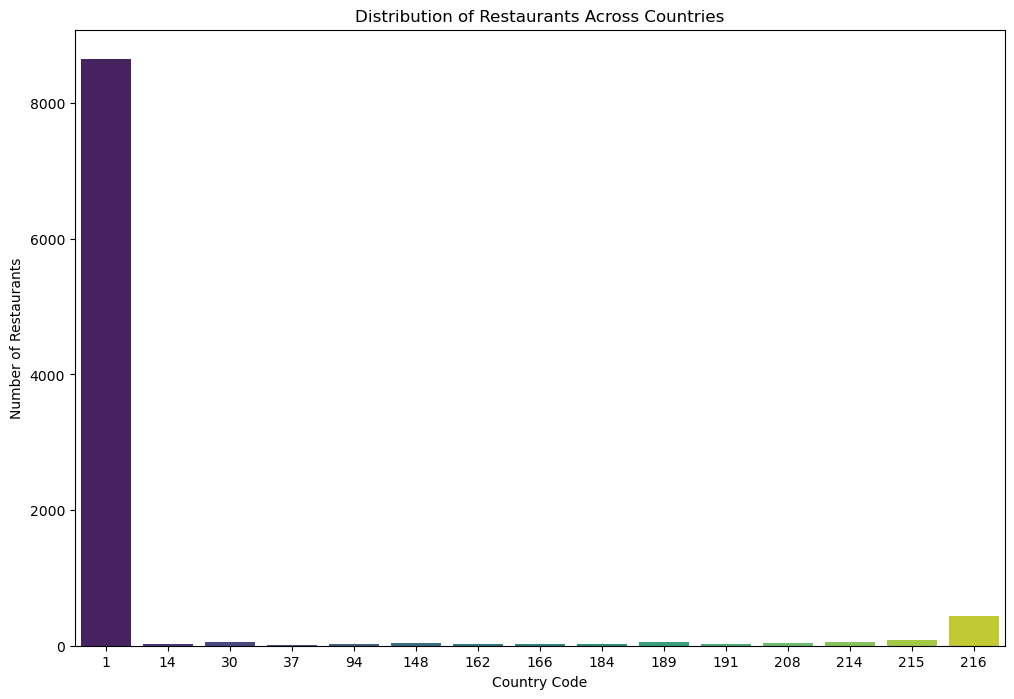

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x=country_code_distribution.index, y=country_code_distribution.values, palette='viridis')
plt.title('Distribution of Restaurants Across Countries')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()

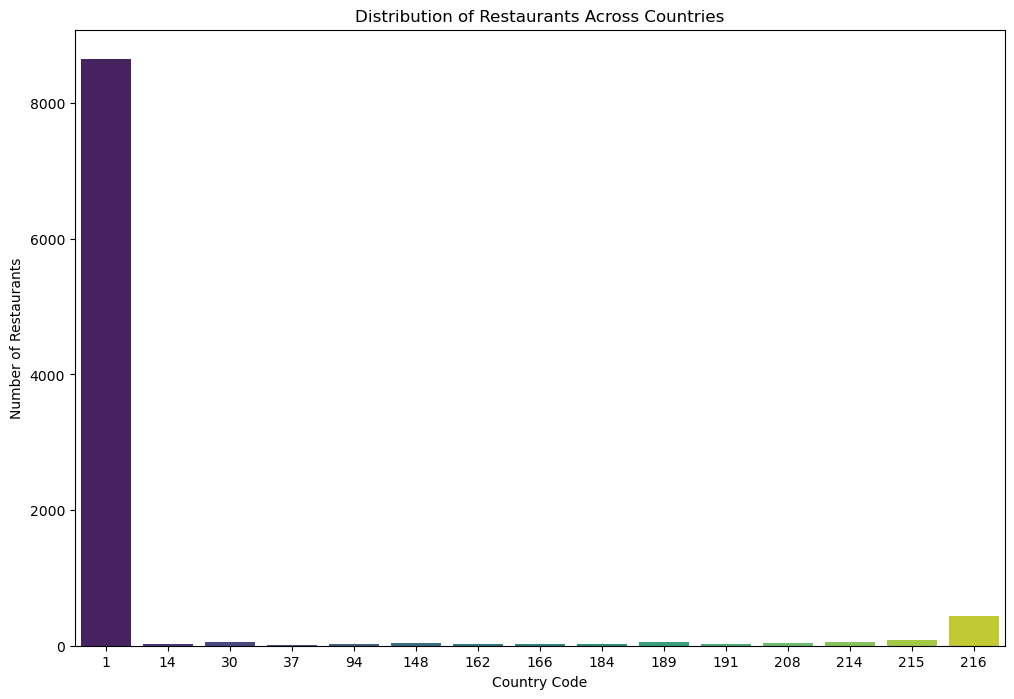

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x=country_code_distribution.index, y=country_code_distribution.values, palette='viridis')
plt.title('Distribution of Restaurants Across Countries')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()

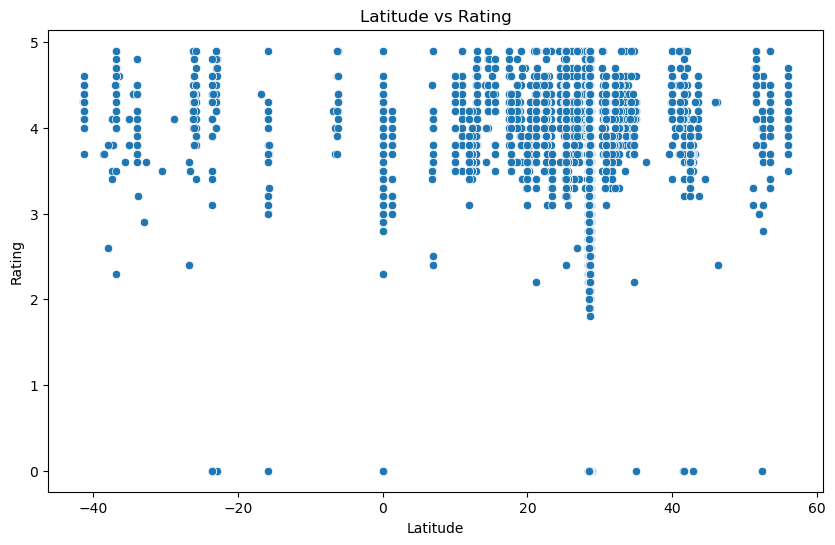

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Aggregate rating', data=ds)
plt.title('Latitude vs Rating')
plt.xlabel('Latitude')
plt.ylabel('Rating')
plt.show()

In [14]:
latitude_rating_corr = ds['Latitude'].corr(ds['Aggregate rating'])
longitude_rating_corr = ds['Longitude'].corr(ds['Aggregate rating'])

print(f"Correlation between latitude and Rating: {latitude_rating_corr}")
print(f"Correlation between longitude and Rating: {longitude_rating_corr}")

Correlation between latitude and Rating: 0.0005155806902360066
Correlation between longitude and Rating: -0.11681757734540432


In [15]:
table_booking_counts = ds['Has Table booking'].value_counts(normalize=True) * 100
print("Percentage of restaurants with and without table booking:")
print(table_booking_counts)

Percentage of restaurants with and without table booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


In [16]:
online_delivery_counts = ds['Has Online delivery'].value_counts(normalize=True) * 100
print("\nPercentage of restaurants with and without online delivery:")
print(online_delivery_counts)


Percentage of restaurants with and without online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [17]:
avg_rating_table_booking = ds.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage ratings of restaurants with and without table booking:")
print(avg_rating_table_booking)


Average ratings of restaurants with and without table booking:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


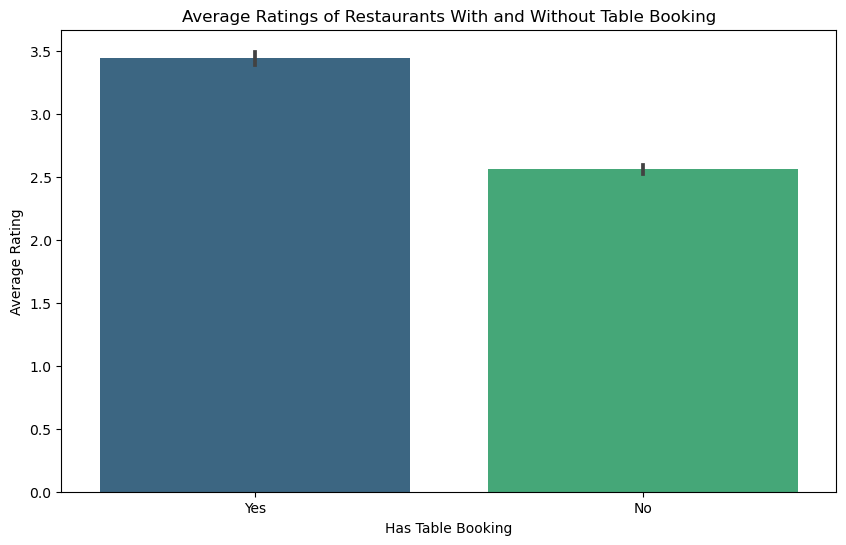

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Has Table booking', y='Aggregate rating', data=ds, palette='viridis')
plt.title('Average Ratings of Restaurants With and Without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.show()

In [19]:
online_delivery_by_price = ds.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print("\nOnline delivery availability among different price ranges:")
print(online_delivery_by_price)


Online delivery availability among different price ranges:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


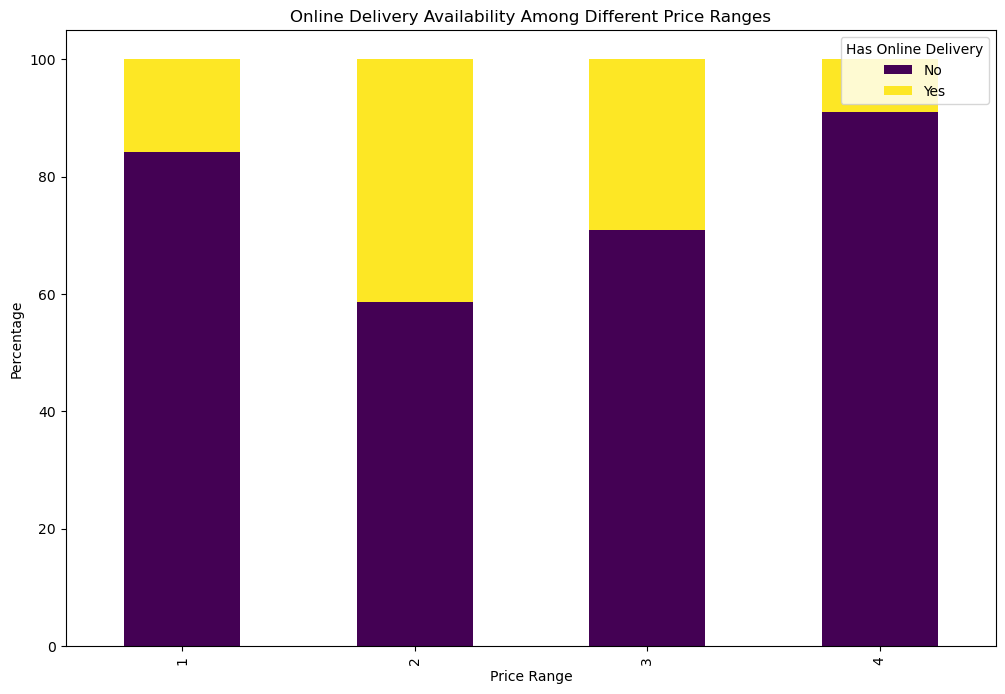

In [20]:
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Online Delivery Availability Among Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Has Online Delivery')
plt.show()

In [21]:
most_common_price_range = ds['Price range'].mode()[0]
print(f"The most common price range is: {most_common_price_range}")

The most common price range is: 1


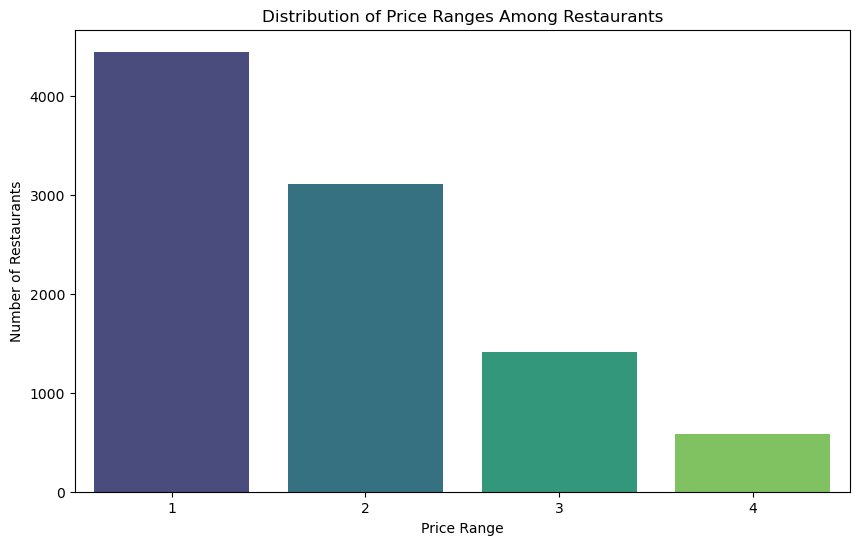

In [22]:
price_range_distribution = ds['Price range'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_distribution.index, y=price_range_distribution.values, palette='viridis')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

In [23]:
ds['Restaurant Name Length'] = ds['Restaurant Name'].apply(len)
ds['Address Length'] = ds['Address'].apply(len)

In [24]:
print("Extracted features (lengths):")
print(ds[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head())

Extracted features (lengths):
          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


In [25]:
ds['Has Table Booking'] = ds['Has Table booking'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
ds['Has Online Delivery'] = ds['Has Online delivery'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

In [26]:
print("\nEncoded features (table booking and online delivery):")
print(ds[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']].head())


Encoded features (table booking and online delivery):
  Has Table booking  Has Table Booking Has Online delivery  \
0               Yes                  1                  No   
1               Yes                  1                  No   
2               Yes                  1                  No   
3                No                  0                  No   
4               Yes                  1                  No   

   Has Online Delivery  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


In [27]:
ds.to_csv('updated_dataset.csv', index=False)

In [28]:
features = ['Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery', 'Price range']
target = 'Aggregate rating'

X = ds[features]
y = ds[target]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R^2 Score: {r2_linear}")

Linear Regression:
Mean Squared Error: 1.742413667959596
R^2 Score: 0.23447705036186373


In [31]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred_tree = tree_regressor.predict(X_test)

ms_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regressor:")
print(f"Mean Squared Error: {ms_tree}")
print(f"R^2 Score: {r2_tree}")


Decision Tree Regressor:
Mean Squared Error: 2.7951451131339113
R^2 Score: -0.22803658569700302
